<a href="https://colab.research.google.com/github/bhavna2608/Digit-Recognition/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import OneHotEncoder

In [2]:
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

In [3]:
y_train = train_df["label"]
x_train = train_df.drop("label", axis=1)

In [4]:
x_train = x_train.values.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = test_df.values.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = np.array(y_train)

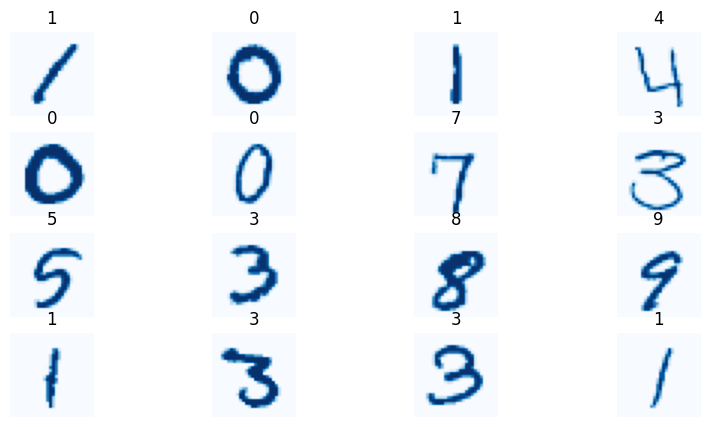

In [5]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
i = 0
for image in x_train[:16]:
    label = y_train[i]
    ax[i // 4, i % 4].imshow(image[:, :, 0], cmap="Blues")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")
    i += 1
plt.show()

In [6]:
enc = OneHotEncoder()
y_train=enc.fit_transform(y_train.reshape(y_train.shape[0],1)).toarray().astype(int)

y_train[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
def Build_Model() -> Sequential:
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(AveragePooling2D((2, 2), padding='same'))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D((2, 2), padding='same'))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D((2, 2), padding='same'))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
model = Build_Model()
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

checkpoint = ModelCheckpoint("digit_weights.h5", monitor='loss', verbose=1, save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='loss', factor=0.8, patience=2, verbose=1, mode='auto', min_delta=0.0001, cooldown=5)

early_stop = EarlyStopping(monitor='loss', mode='min', patience=20, restore_best_weights=True)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=32,
    callbacks=[checkpoint, early_stop, reduceLROnPlat]
)

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'Accuracy: {str(acc[-1])}')
plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(loss, label='Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Loss: {str(loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout()
plt.show()

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

In [ ]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
i = 0
for image in x_test[:50]:
    label = pred[i]
    ax[i // 5, i % 5].imshow(image[:, :, 0], cmap="Blues")
    ax[i // 5, i % 5].set_title(label)
    ax[i // 5, i % 5].axis("off")
    i += 1
plt.show()